In [1]:
from pathways.scenarios import run_scenarios, load_scenario_table
from pathways.simulation import load_configuration
from pathways.outputs import save_scenario_result_to_pandas

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

%matplotlib inline

In [3]:
from pathlib import Path
datadir = Path("tests/test_summaries")
basic_config = load_configuration(datadir / "config.yml")
rate_scenario_table = load_scenario_table(datadir / "contamination_rate_estimation.csv")
inspection_scenario_table = load_scenario_table(datadir / "inspection_scenarios.csv")
consignment_scenario_table = load_scenario_table(datadir / "consignment_scenarios.csv")

In [44]:
num_consignments = 6082
fitted_contamination_rate_results = run_scenarios(
    config=basic_config,
    scenario_table=rate_scenario_table,
    seed=42,
    num_simulations=5,
    num_consignments=num_consignments,
    detailed=False,
)

Running scenario: contamination rate 1
Running scenario: contamination rate 2
Running scenario: contamination rate 3
Running scenario: contamination rate 4
Running scenario: contamination rate 5
Running scenario: contamination rate 6


In [45]:
df_fitted = save_scenario_result_to_pandas(
    fitted_contamination_rate_results,
    config_columns=[
        "name",
        "consignment name",
        "inspection name",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "contamination/clustered/distribution",
        "contamination/clustered/max_contaminated_units_per_cluster",
    ],
    result_columns=[
        "true_contamination_rate",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
        "avg_boxes_opened_completion",
    ],
)

In [46]:
df_fitted['consignment failure rate'] = df_fitted["intercepted"] / num_consignments
df_fitted

name                  consignment name  \
0  contamination rate 1        random mean 0.003 sd 0.032   
1  contamination rate 2     clustered mean 0.003 sd 0.032   
2  contamination rate 3     random mean 0.0019 sd 0.01875   
3  contamination rate 4  clustered mean 0.0019 sd 0.01875   
4  contamination rate 5      random mean 0.0004 sd 0.0031   
5  contamination rate 6   clustered mean 0.0004 sd 0.0031   

                 inspection name contamination/contamination_rate/parameters  \
0  box hypergeometric 0.1 random                            [0.0088, 2.9121]   
1  box hypergeometric 0.1 random                            [0.0088, 2.9121]   
2  box hypergeometric 0.1 random                            [0.0102, 5.3839]   
3  box hypergeometric 0.1 random                            [0.0102, 5.3839]   
4  box hypergeometric 0.1 random                             [0.0166, 41.59]   
5  box hypergeometric 0.1 random                             [0.0166, 41.59]   

  contamination/arrangement contamination/clustered/distribution  \
0                    random                                        
1                 clustered                               random   
2                    random                                        
3                 clustered                               random   
4                    random                                        
5                 clustered                               random   

  contamination/clustered/max_contaminated_units_per_cluster  \
0                                                              
1                                                  2           
2                                                              
3                                                  2           
4                                                              
5                                                  2           

   true_contamination_rate  false_neg  intercepted  total_missed_contaminants  \
0                 0.003008      104.6        281.4                    53447.4   
1                 0.003031      105.6        264.6                    66042.8   
2                 0.001823      117.2        279.2                    44705.0   
3                 0.001827      120.0        272.2                    86674.8   
4                 0.000383      172.4        266.6                    41240.0   
5                 0.000379      165.4        269.8                    66675.8   

   total_intercepted_contaminants  avg_boxes_opened_completion  \
0                       1024182.6                    13.894443   
1                        527223.8                    13.894443   
2                        448221.0                    13.894443   
3                        253291.2                    13.894443   
4                         18093.6                    13.894443   
5                         41422.8                    13.894443   

   consignment failure rate  
0                  0.046268  
1                  0.043505  
2                  0.045906  
3                  0.044755  
4                  0.043834  
5                  0.044360

In [47]:
# Format dataframe
column_names = ["consignment name", "inspection name", "beta parameters", "contaminant arrangement", "cluster distribution", "infested boxes per cluster", "simulated contamination rate (mean)", "consignment failure rate"]
df_contamination_pretty = df_fitted.iloc[:,[1,2,3,4,5,6,7,13]]

df_contamination_pretty.columns = column_names
df_contamination_pretty.iloc[:,6] = df_contamination_pretty.iloc[:,6].round(decimals=4)
df_contamination_pretty.iloc[:,7] = df_contamination_pretty.iloc[:,7].round(decimals=4)

df_contamination_pretty.to_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/use_cases/contamination_rate_results.csv")

In [48]:
# If loading results from saved csv, uncomment and run this chunk.

#df_contamination_pretty = pd.read_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/contamination_rate_results.csv")

In [49]:
num_consignments = 6082
inspection_scenario_results = run_scenarios(
    config=basic_config,
    scenario_table=inspection_scenario_table,
    seed=42,
    num_simulations=3,
    num_consignments=num_consignments,
    detailed=False,
)

Running scenario: inspection scenario 1
Running scenario: inspection scenario 2
Running scenario: inspection scenario 3
Running scenario: inspection scenario 4
Running scenario: inspection scenario 5
Running scenario: inspection scenario 6
Running scenario: inspection scenario 7
Running scenario: inspection scenario 8
Running scenario: inspection scenario 9
Running scenario: inspection scenario 10
Running scenario: inspection scenario 11
Running scenario: inspection scenario 12
Running scenario: inspection scenario 13
Running scenario: inspection scenario 14
Running scenario: inspection scenario 15
Running scenario: inspection scenario 16
Running scenario: inspection scenario 17
Running scenario: inspection scenario 18


In [50]:
df_inspections = save_scenario_result_to_pandas(
    inspection_scenario_results,
    config_columns=[
        "name",
        "inspection/unit",
        "inspection/sample_strategy",
        "inspection/proportion/value",
        "inspection/hypergeometric/detection_level",
        "inspection/selection_strategy",
        "inspection/cluster/cluster_selection",

    ],
    result_columns=[
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
    ],
)

In [51]:
df_inspections['consignment failure rate'] = df_inspections["intercepted"] / num_consignments
contaminated_consignments = df_inspections["false_neg"] + df_inspections["intercepted"]
df_inspections["inspection success rate"] = df_inspections["intercepted"] / contaminated_consignments
df_inspections

name inspection/unit inspection/sample_strategy  \
0    inspection scenario 1           items             hypergeometric   
1    inspection scenario 2           items             hypergeometric   
2    inspection scenario 3           items             hypergeometric   
3    inspection scenario 4           items             hypergeometric   
4    inspection scenario 5           items             hypergeometric   
5    inspection scenario 6           items             hypergeometric   
6    inspection scenario 7           items             hypergeometric   
7    inspection scenario 8           items             hypergeometric   
8    inspection scenario 9           items                 proportion   
9   inspection scenario 10           items                 proportion   
10  inspection scenario 11           items                 proportion   
11  inspection scenario 12           items                 proportion   
12  inspection scenario 13           boxes             hypergeometric   
13  inspection scenario 14           boxes             hypergeometric   
14  inspection scenario 15           boxes             hypergeometric   
15  inspection scenario 16           boxes             hypergeometric   
16  inspection scenario 17           boxes                 proportion   
17  inspection scenario 18           boxes                 proportion   

   inspection/proportion/value inspection/hypergeometric/detection_level  \
0                                                                   0.05   
1                                                                   0.05   
2                                                                   0.05   
3                                                                   0.05   
4                                                                    0.1   
5                                                                    0.1   
6                                                                    0.1   
7                                                                    0.1   
8                         0.02                                             
9                         0.02                                             
10                        0.02                                             
11                        0.02                                             
12                                                                  0.05   
13                                                                  0.05   
14                                                                   0.1   
15                                                                   0.1   
16                        0.02                                             
17                        0.02                                             

   inspection/selection_strategy inspection/cluster/cluster_selection  \
0                         random                                        
1                    convenience                                        
2                        cluster                             interval   
3                        cluster                               random   
4                         random                                        
5                    convenience                                        
6                        cluster                             interval   
7                        cluster                               random   
8                         random                                        
9                    convenience                                        
10                       cluster                             interval   
11                       cluster                               random   
12                        random                                        
13                   convenience                                        
14                        random                                        
15                   

In [52]:
# Format dataframe
column_names = ["name", "inspection unit", "sample strategy", "sample parameter", "selection strategy", "cluster selection", "avg contamination rate", "max missed contamination rate", "avg missed contamination rate", "max intercepted contamination rate", "avg intercepted contamination rate", "boxes opened completion", "boxes opened detection", "items inspected completion", "items inspected detection", "missed", "intercepted", "missed contaminants", "intercepted contamininants", "consignment failure rate", "inspection success rate", "sample size method", "selection method"]


In [53]:

df_inspections_pretty = df_inspections.loc[:, df_inspections.columns != 'inspection/hypergeometric/detection_level']
hypergeometric_parameters = df_inspections.iloc[[0,1,2,3,4,5,6,7,12,13,14,15],4]
df_inspections_pretty.iloc[[0,1,2,3,4,5,6,7,12,13,14,15],3] = hypergeometric_parameters
df_inspections_pretty.iloc[:,3] = df_inspections_pretty.iloc[:,3].astype(str)

df_inspections_pretty["sample size method"] = df_inspections_pretty[['inspection/sample_strategy', 'inspection/proportion/value']].agg(' '.join, axis=1)
df_inspections_pretty["selection method"] = df_inspections_pretty[["inspection/unit", 'inspection/selection_strategy', 'inspection/cluster/cluster_selection']].agg(' '.join, axis=1)

df_inspections_pretty.columns = column_names
df_inspections_pretty.iloc[:,6:11] = df_inspections_pretty.iloc[:,6:11].round(decimals=4)
df_inspections_pretty.iloc[:,11:19] = df_inspections_pretty.iloc[:,11:19].astype(int)
df_inspections_pretty.iloc[:,19:21] = df_inspections_pretty.iloc[:,19:21].round(decimals=4)
df_inspections_pretty.columns
df_inspections_pretty.iloc[:18,[0,1,21,22,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

df_inspections_pretty.to_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/use_cases/inspection_scenario_results.csv")

In [54]:
# If loading results from saved csv, uncomment and run this chunk.

#df_inspections_pretty = pd.read_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/inspection_scenario_results.csv")

In [55]:
colors = {"hypergeometric 0.1": "#1f78b4", "hypergeometric 0.05": "#a6cee3", "proportion 0.02":"#b2df8a"}
patch_1 = mpatches.Patch(color="#a6cee3", label="hypergeometric 0.05")
patch_2 = mpatches.Patch(color="#1f78b4", label="hypergeometric 0.1")
patch_3 = mpatches.Patch(color="#b2df8a", label="proportion 0.02")

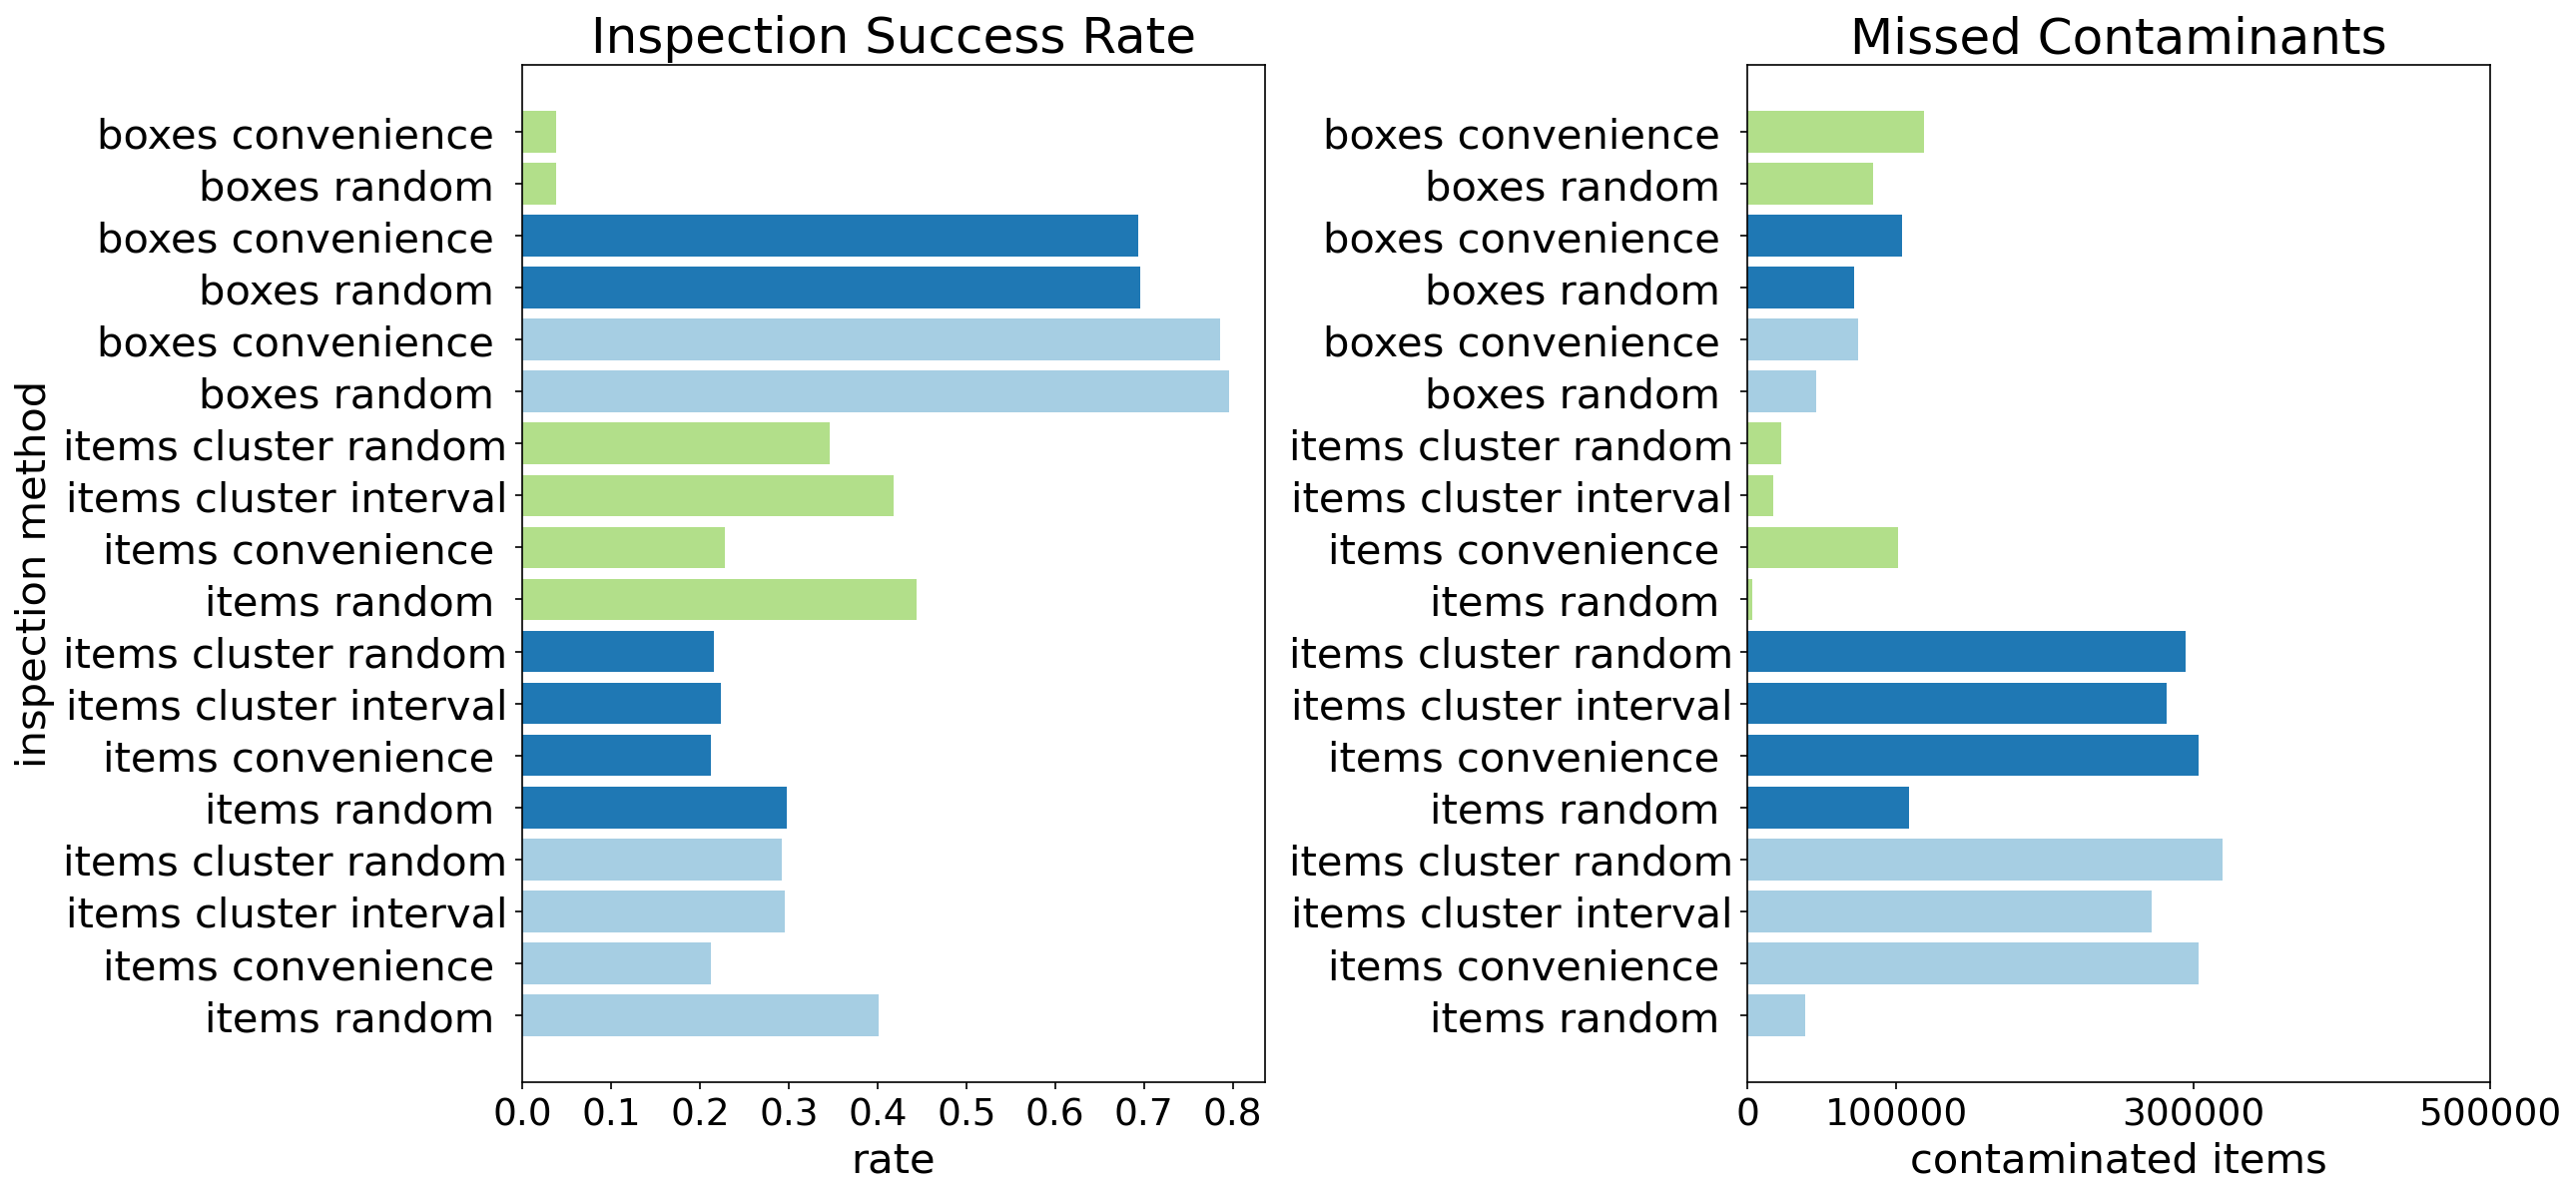

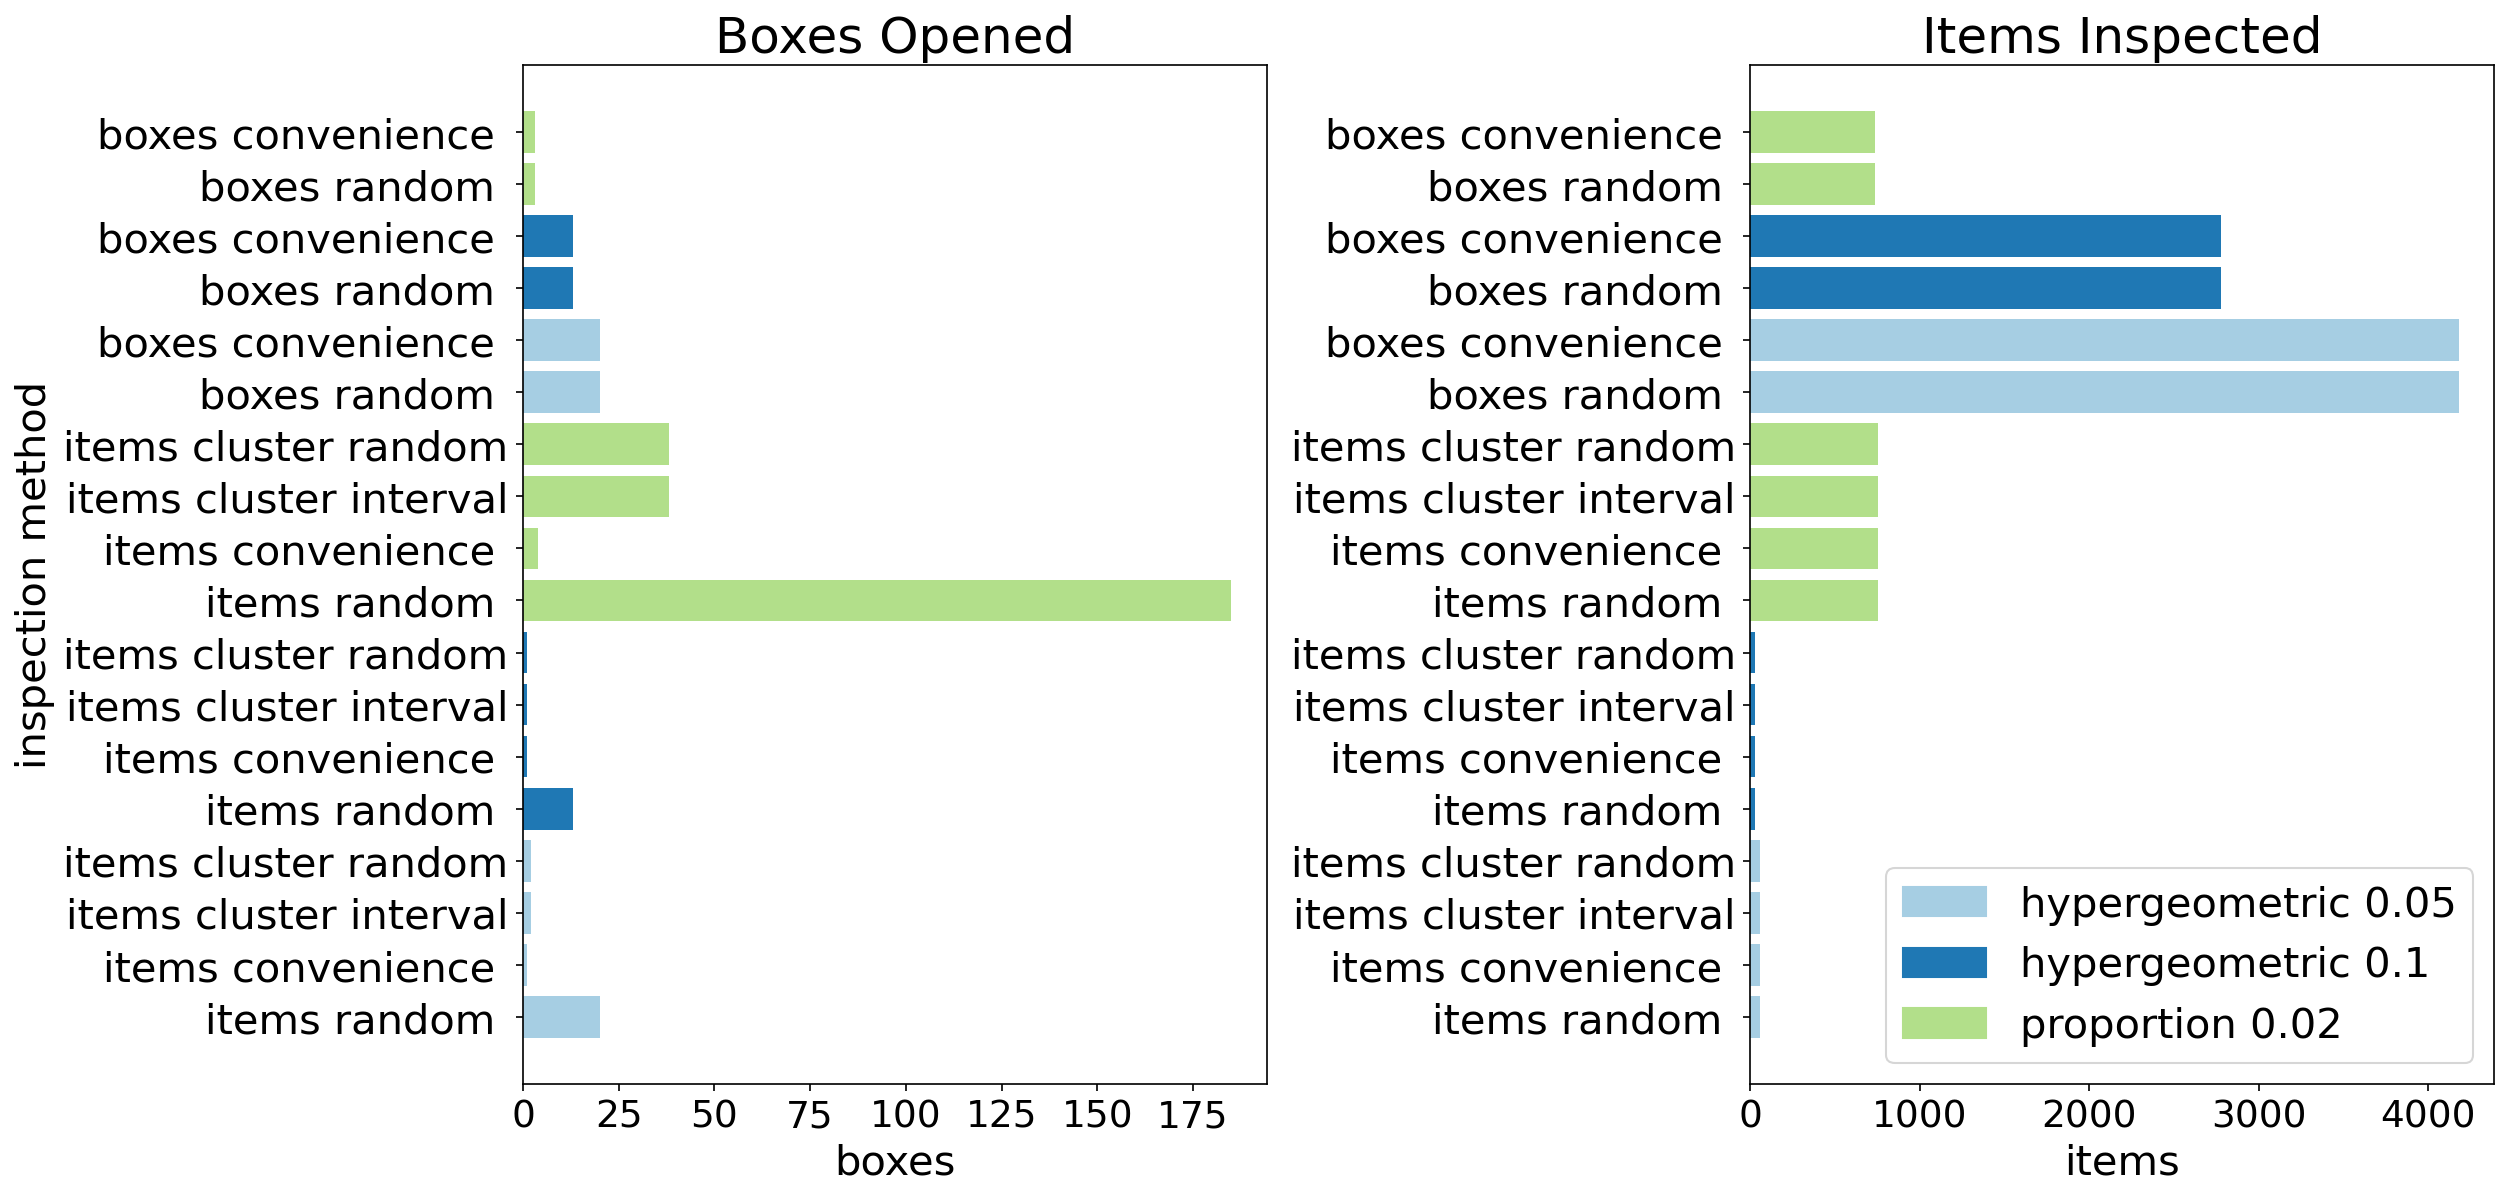

In [56]:
plt.figure(figsize=(18, 9), dpi=150)
plt.subplot(121)
plt.subplots_adjust(wspace=0.65,left=0.22,right=0.95)
plt.barh(df_inspections_pretty["name"], df_inspections_pretty["inspection success rate"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Inspection Success Rate", fontsize=24)
plt.ylabel("inspection method", fontsize=20)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], fontsize=20)
plt.xticks(fontsize=18)
plt.subplot(122)
plt.barh(df_inspections_pretty["name"], df_inspections_pretty["missed contaminants"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Missed Contaminants", fontsize=24)
plt.xlabel("contaminated items", fontsize=20)
plt.yticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], fontsize=20)
plt.xticks(ticks=[0,100000,300000,500000],fontsize=18)
plt.savefig("inspection_scenario_plots_1.png")
plt.show()

plt.figure(figsize=(18, 9), dpi=150)
plt.subplot(121)
plt.subplots_adjust(wspace=0.65,left=0.22,right=0.95)
plt.barh(df_inspections_pretty["name"], df_inspections_pretty["boxes opened completion"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Boxes Opened", fontsize=24)
plt.ylabel("inspection method", fontsize=20)
plt.xlabel("boxes", fontsize=20)
plt.yticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], fontsize=20)
plt.xticks(fontsize=18)
plt.subplot(122)
plt.barh(df_inspections_pretty["name"], df_inspections_pretty["items inspected completion"], color=df_inspections_pretty['sample size method'].replace(colors))
plt.title("Items Inspected", fontsize=24)
plt.xlabel("items", fontsize=20)
plt.legend(handles=[patch_1,patch_2,patch_3], loc = "lower right", fontsize=20)
plt.yticks(ticks=np.arange(18),labels=df_inspections_pretty["selection method"], fontsize=20)
plt.xticks(ticks=[0,1000,2000,3000,4000],fontsize=18)
plt.savefig("inspection_scenario_plots_2.png")
plt.show()



In [57]:
num_consignments = 6082
consignment_scenario_results = run_scenarios(
    config=basic_config,
    scenario_table=consignment_scenario_table,
    seed=42,
    num_simulations=3,
    num_consignments=num_consignments,
    detailed=False,
)

Running scenario: consignment scenarios 1
Running scenario: consignment scenarios 2
Running scenario: consignment scenarios 3
Running scenario: consignment scenarios 4
Running scenario: consignment scenarios 5
Running scenario: consignment scenarios 6
Running scenario: consignment scenarios 7
Running scenario: consignment scenarios 8
Running scenario: consignment scenarios 9
Running scenario: consignment scenarios 10
Running scenario: consignment scenarios 11
Running scenario: consignment scenarios 12
Running scenario: consignment scenarios 13


In [58]:
df_consignments = save_scenario_result_to_pandas(
    consignment_scenario_results,
    config_columns=[
        "name",
        "consignment name",
        "consignment/boxes/min",
        "consignment/boxes/max",
        "consignment/items_per_box/default",
        "contamination/contamination_unit",
        "contamination/contamination_rate/distribution",
        "contamination/contamination_rate/parameters",
        "contamination/arrangement",
        "contamination/clustered/distribution",
        "contamination/clustered/max_contaminated_units_per_cluster",
        "contamination/clustered/random/max_cluster_item_width",
    ],
    result_columns=[
        "true_contamination_rate",
        "max_missed_contamination_rate",
        "avg_missed_contamination_rate",
        "max_intercepted_contamination_rate",
        "avg_intercepted_contamination_rate",
        "avg_boxes_opened_completion",
        "avg_boxes_opened_detection",
        "avg_items_inspected_completion",
        "avg_items_inspected_detection",
        "false_neg",
        "intercepted",
        "total_missed_contaminants",
        "total_intercepted_contaminants",
    ],
)

In [59]:
df_consignments['consignment failure rate'] = df_consignments["intercepted"] / num_consignments
contaminated_consignments = df_consignments["false_neg"] + df_consignments["intercepted"]
df_consignments["inspection success rate"] = df_consignments["intercepted"] / contaminated_consignments
df_consignments["contaminated_consignments"] = contaminated_consignments

In [60]:
# Format dataframe 
column_names = ["name", "consignment name", "items per box", "contamination unit", "contamination parameters", "contaminant arrangement", "cluster distribution", "max contaminated units per cluster", "cluster width", "avg contamination rate", "avg missed contamination rate", "avg intercepted contamination rate", "boxes opened completion", "items inspected completion", "missed contaminants", "intercepted contamininants", "inspection success rate", "contaminated_consignments"]


In [62]:
df_consignments_pretty = df_consignments
df_consignments_pretty.iloc[:,12:17] = df_consignments_pretty.iloc[:,12:17].round(decimals=4)
df_consignments_pretty.iloc[:,17:25] = df_consignments_pretty.iloc[:,17:25].astype(int)
df_consignments_pretty.iloc[:,25:27] = df_consignments_pretty.iloc[:,25:27].round(decimals=4)
df_consignments_pretty.iloc[:,[27]] = df_consignments_pretty.iloc[:,[27]].astype(int)
df_consignments_pretty = df_consignments_pretty.iloc[:,[0,1,4,5,7,8,9,10,11,12,14,16,17,19,23,24,26,27]]
df_consignments_pretty.columns = column_names
df_consignments_pretty

df_consignments_pretty.to_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/use_cases/consignment_scenario_results.csv")

In [63]:
# If loading results from saved csv, uncomment and run this chunk.

#df_consignments_pretty = pd.read_csv("H:/Shared drives/APHIS  Projects/Pathways/Results/consignment_scenario_results.csv")

In [64]:
df_cargo_config = df_consignments_pretty.loc[0:2,:]
df_contamination_rate_scenarios = df_consignments_pretty.loc[[0,3,4,5,6,7],:]
df_contaminant_arrangement_scenarios = df_consignments_pretty.loc[[0,8,9,10,11,12],:]

In [65]:
colors = {"hypergeometric 0.1": "#1f78b4", "hypergeometric 0.05": "#a6cee3", "proportion 0.02":"#b2df8a"}
patch_1 = mpatches.Patch(color="#1f78b4", label="hypergeometric 0.1")
patch_2 = mpatches.Patch(color="#a6cee3", label="hypergeometric 0.05")
patch_3 = mpatches.Patch(color="#b2df8a", label="proportion 0.02")

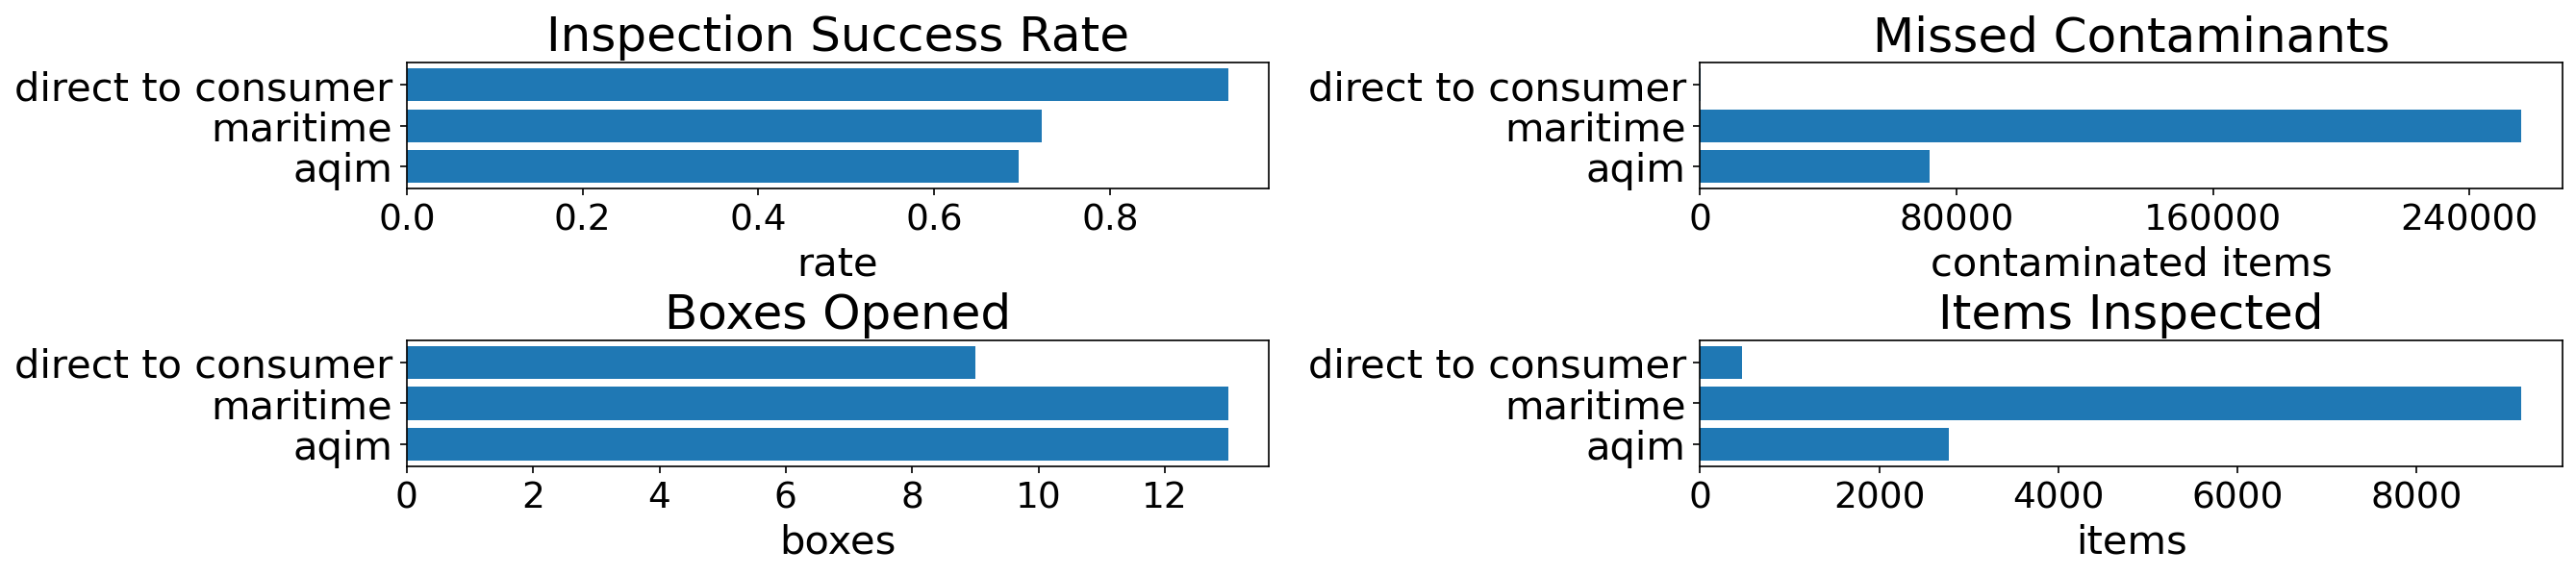

In [70]:

plt.figure(figsize=(18, 4), dpi=150)
plt.subplot(221)
plt.subplots_adjust(wspace=0.5,left=0.15,right=0.98,top=0.9, hspace=1.2, bottom=0.2)
plt.barh(df_cargo_config["name"], df_cargo_config["inspection success rate"], color="#1f78b4")
plt.title("Inspection Success Rate", fontsize=24)
#plt.ylabel("consignment scenario", fontsize=18)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(3),labels=df_cargo_config["consignment name"], fontsize=20)
plt.xticks(fontsize=18)
plt.subplot(222)
plt.barh(df_cargo_config["name"], df_cargo_config["missed contaminants"], color="#1f78b4")
plt.title("Missed Contaminants", fontsize=24)
plt.xlabel("contaminated items", fontsize=20)
plt.yticks(ticks=np.arange(3),labels=df_cargo_config["consignment name"],fontsize=20)
plt.xticks(ticks=[0,80000,160000,240000],fontsize=18)

plt.subplot(223)
plt.barh(df_cargo_config["name"], df_cargo_config["boxes opened completion"], color="#1f78b4")
plt.title("Boxes Opened", fontsize=24)
#plt.ylabel("consignment scenario", fontsize=18)
plt.xlabel("boxes", fontsize=20)
plt.yticks(ticks=np.arange(3),labels=df_cargo_config["consignment name"], fontsize=20)
plt.xticks(fontsize=18)
plt.subplot(224)
plt.barh(df_cargo_config["name"], df_cargo_config["items inspected completion"], color="#1f78b4")
plt.title("Items Inspected", fontsize=24)
plt.xlabel("items", fontsize=20)
plt.yticks(ticks=np.arange(3),labels=df_cargo_config["consignment name"], fontsize=20)
plt.xticks(fontsize=18)
plt.savefig("cargo_config_scenario_plots.png")
plt.show()



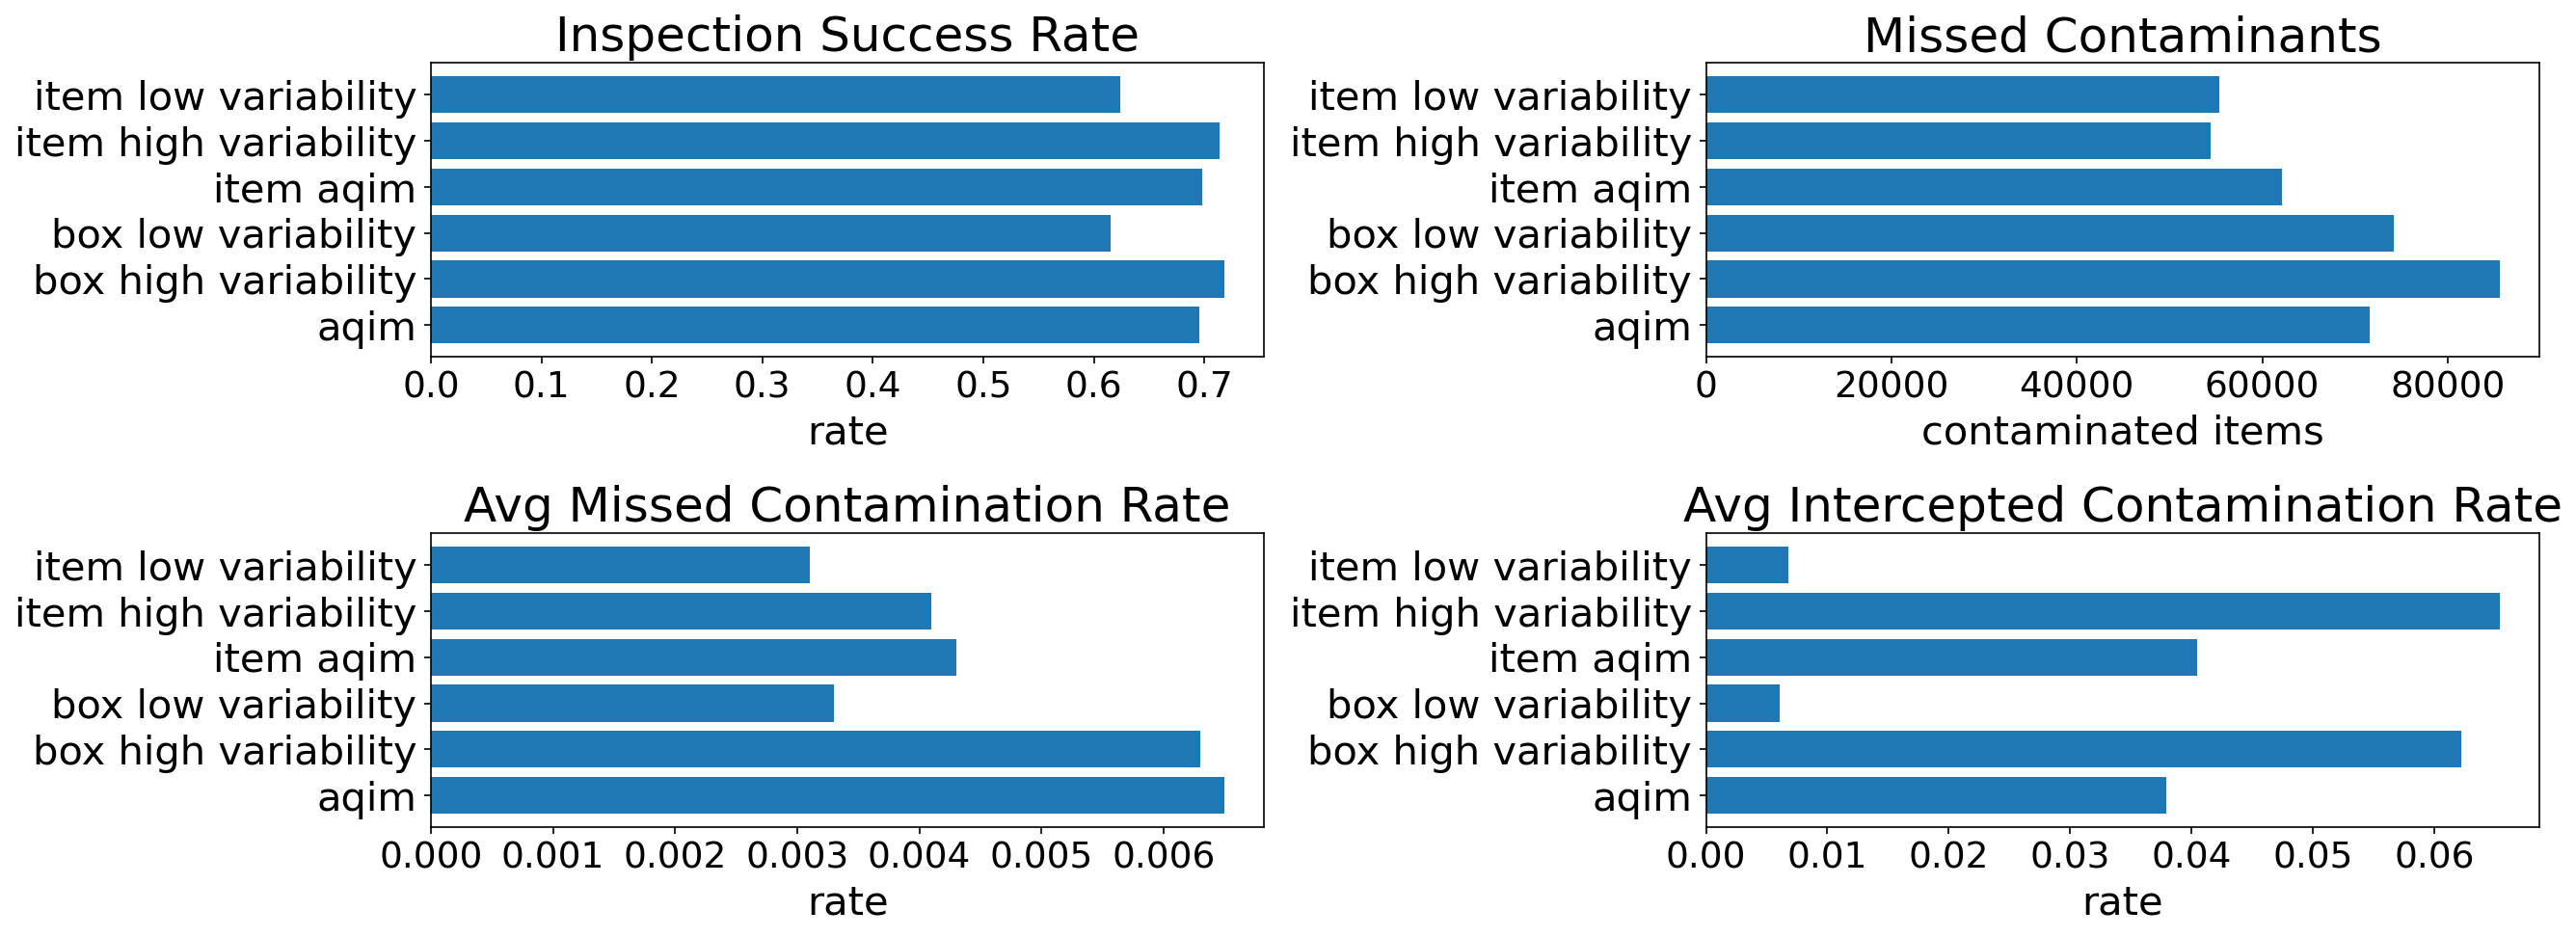

In [67]:
plt.figure(figsize=(18, 7), dpi=150)
plt.subplot(221)
plt.subplots_adjust(wspace=0.53,left=0.16,right=0.97, hspace=0.6)
plt.barh(df_contamination_rate_scenarios["name"], df_contamination_rate_scenarios["inspection success rate"])
plt.title("Inspection Success Rate", fontsize=24)
#plt.ylabel("consignment scenario", fontsize=18)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contamination_rate_scenarios["consignment name"], fontsize=20)
plt.xticks(fontsize=18)
plt.subplot(222)
plt.barh(df_contamination_rate_scenarios["name"], df_contamination_rate_scenarios["missed contaminants"])
plt.title("Missed Contaminants", fontsize=24)
plt.xlabel("contaminated items", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contamination_rate_scenarios["consignment name"],fontsize=20)
plt.xticks(ticks=[0,20000,40000,60000,80000],fontsize=18)

plt.subplot(223)
plt.barh(df_contamination_rate_scenarios["name"], df_contamination_rate_scenarios["avg missed contamination rate"])
plt.title("Avg Missed Contamination Rate", fontsize=24)
#plt.ylabel("consignment scenario", fontsize=18)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contamination_rate_scenarios["consignment name"], fontsize=20)
plt.xticks(fontsize=18)
plt.subplot(224)
plt.barh(df_contamination_rate_scenarios["name"], df_contamination_rate_scenarios["avg intercepted contamination rate"])
plt.title("Avg Intercepted Contamination Rate", fontsize=24)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contamination_rate_scenarios["consignment name"], fontsize=20)
plt.xticks(fontsize=18)
plt.savefig("contamination_rate_scenarios_plots.png")
plt.show()



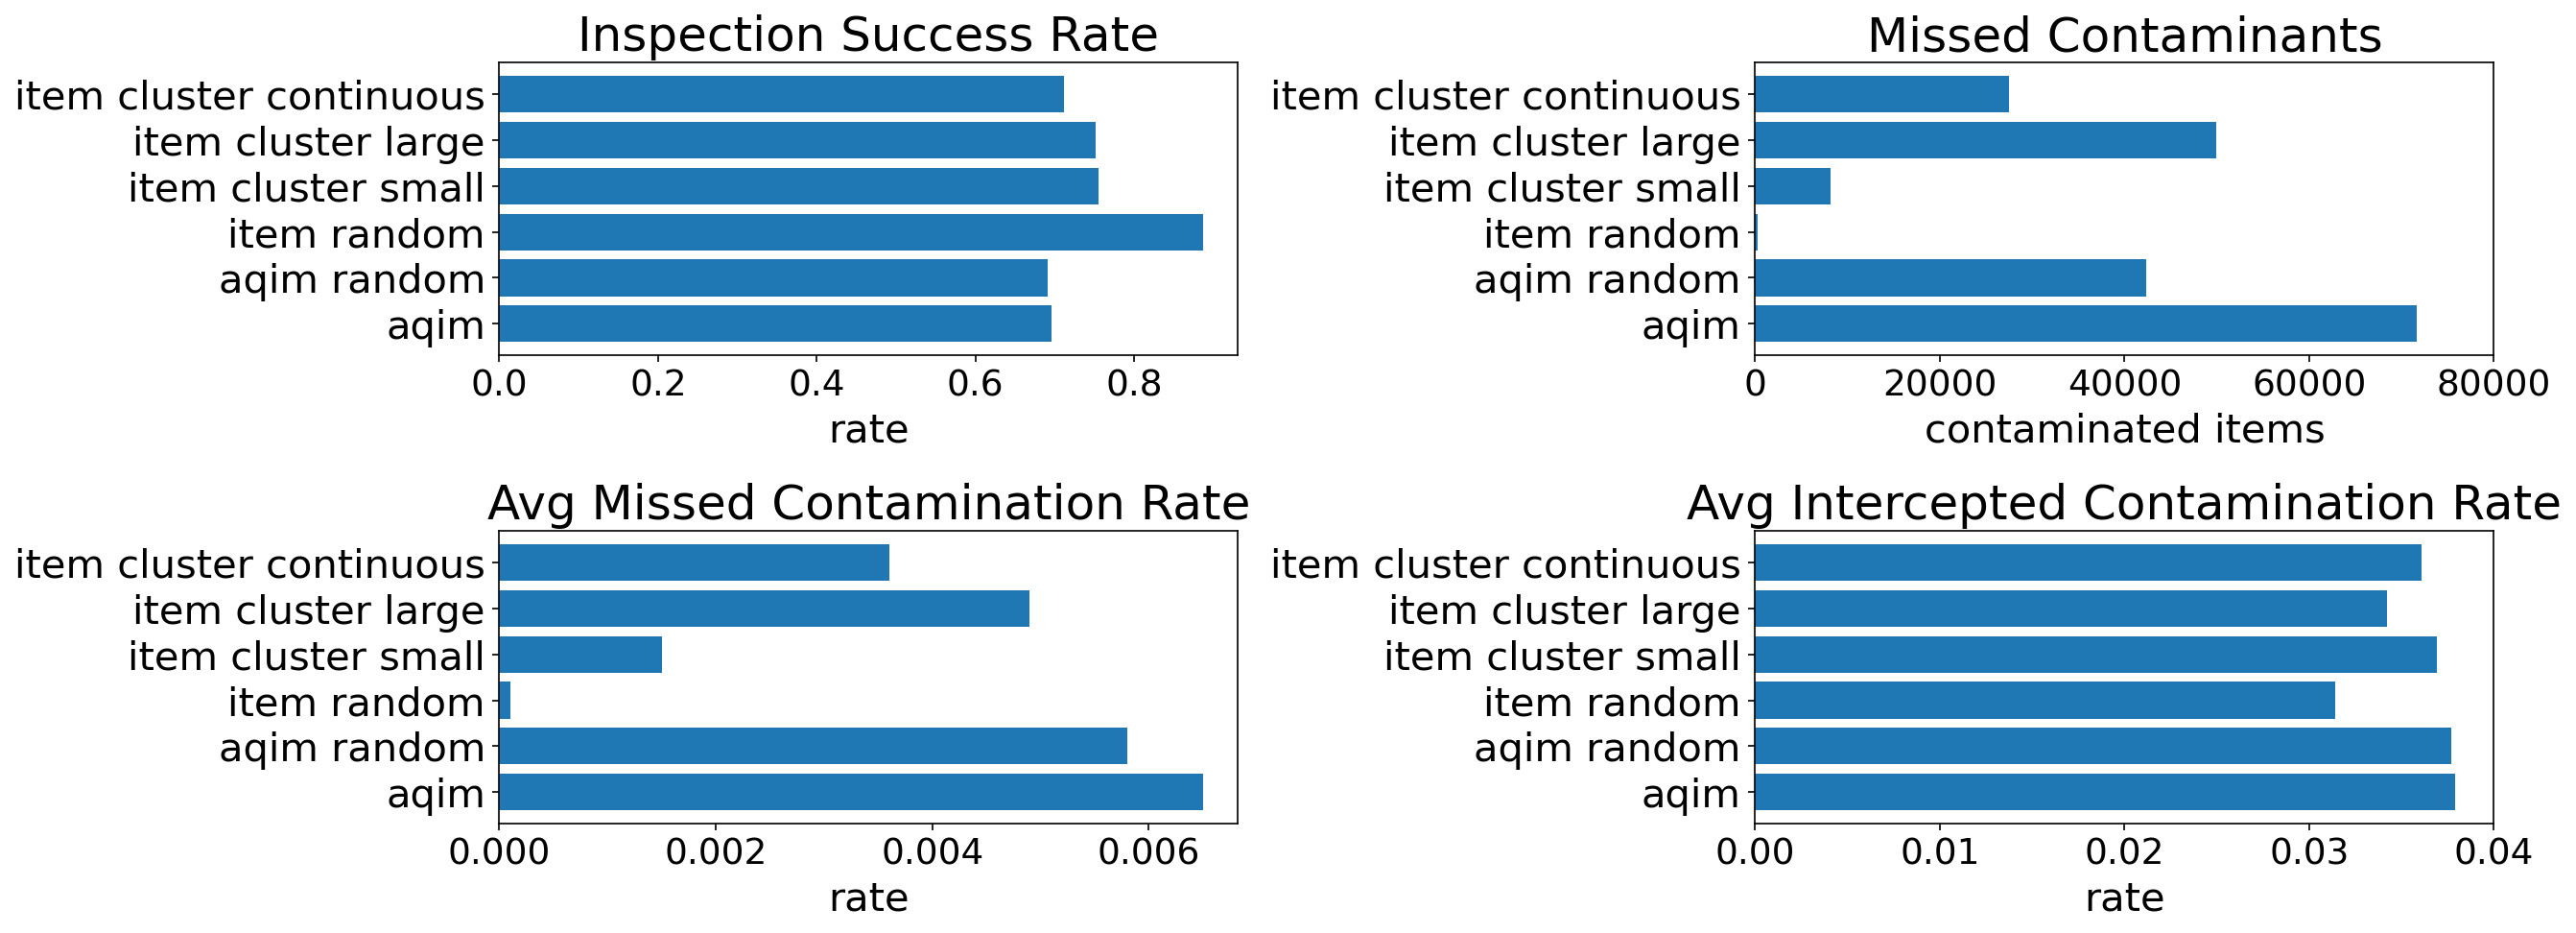

In [68]:
plt.figure(figsize=(18, 7), dpi=150)
plt.subplot(221)
plt.subplots_adjust(wspace=0.7,left=0.2,right=0.97, hspace=0.6)
plt.barh(df_contaminant_arrangement_scenarios["name"], df_contaminant_arrangement_scenarios["inspection success rate"])
plt.title("Inspection Success Rate", fontsize=24)
#plt.ylabel("consignment scenario", fontsize=18)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contaminant_arrangement_scenarios["consignment name"], fontsize=20)
plt.xticks(fontsize=18)
plt.subplot(222)
plt.barh(df_contaminant_arrangement_scenarios["name"], df_contaminant_arrangement_scenarios["missed contaminants"])
plt.title("Missed Contaminants", fontsize=24)
plt.xlabel("contaminated items", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contaminant_arrangement_scenarios["consignment name"],fontsize=20)
plt.xticks(ticks=[0,20000,40000,60000,80000],fontsize=18)


plt.subplot(223)
plt.barh(df_contaminant_arrangement_scenarios["name"], df_contaminant_arrangement_scenarios["avg missed contamination rate"])
plt.title("Avg Missed Contamination Rate", fontsize=24)
#plt.ylabel("consignment scenario", fontsize=18)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contaminant_arrangement_scenarios["consignment name"], fontsize=20)
plt.xticks(ticks=[0, 0.002,0.004,0.006], fontsize=18)
plt.subplot(224)
plt.barh(df_contaminant_arrangement_scenarios["name"], df_contaminant_arrangement_scenarios["avg intercepted contamination rate"])
plt.title("Avg Intercepted Contamination Rate", fontsize=24)
plt.xlabel("rate", fontsize=20)
plt.yticks(ticks=np.arange(6),labels=df_contaminant_arrangement_scenarios["consignment name"], fontsize=20)
plt.xticks(ticks=[0,0.01,0.02,0.03,0.04], fontsize=18)
plt.savefig("contaminant_arrangement_scenarios_plots.png")
plt.show()

